In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

Consider the Rosenbrock function
$$f(x,y)=10(y-x^2)^2 + (1-x)^2$$
with gradient
$$\nabla f = \left[\begin{array}{c}
40x^3 - 40xy +2x - 2 \\\
20(y-x^2)
\end{array}\right]$$
and Hessian
$$\nabla^2 f = \left[
\begin{array}{c}
120x^2-40y+2 & -40x \\\
-40x & 20
\end{array}\right]$$
The only minimum is at $(x,y)=(1,1)$ where $f(1,1)=0$.

In [2]:
def objfun(x,y):
    return 10*(y-x**2)**2 + (1-x)**2
def gradient(x,y):
    return np.array([-40*x*y + 40*x**3 -2 + 2*x, 20*(y-x**2)])
def hessian(x,y):
    return np.array([[120*x*x - 40*y+2, -40*x],[-40*x, 20]])

Create a utility function that plots the contours of the Rosenbrock function.

In [3]:
def contourplot(objfun, xmin, xmax, ymin, ymax, ncontours=50, fill=True):

    x = np.linspace(xmin, xmax, 200)
    y = np.linspace(ymin, ymax, 200)
    X, Y = np.meshgrid(x,y)
    Z = objfun(X,Y)
    if fill:
        plt.contourf(X,Y,Z,ncontours); # plot the contours
    else:
        plt.contour(X,Y,Z,ncontours); # plot the contours
    plt.scatter(1,1,marker="x",s=50,color="r");  # mark the minimum

Here is a contour plot of the Rosenbrock function, with the global minimum marked with a red cross.

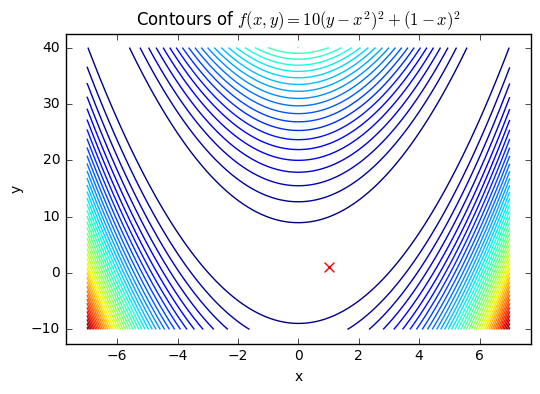

In [4]:
contourplot(objfun, -7,7, -10, 40, fill=False)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contours of $f(x,y)=10(y-x^2)^2 + (1-x)^2$");

# Steepest descent (gradient descent) with decreasing step length

First we write a function that uses the steepest descent method. Initializes the solution at position `init`, moves along the opposite of the gradient with step length $\alpha_k =\alpha_0 /(k+1)^{\gamma}$, until the absolute difference between function values drops below `tolerance` or until the number of iterations exceeds `maxiter`.

The function returns the array of all intermediate positions, and the array of function values.

In [22]:
def steepestdescent(objfun, gradient, init, tolerance=1e-6, maxiter=1000, alpha0=0.01, gamma=0.25):
    p = init
    iterno=0
    parray = [p]
    fprev = objfun(p[0],p[1])
    farray = [fprev]
    while iterno < maxiter:
        steplength = alpha0 * (iterno+1)**(-gamma)
        p = p - steplength*gradient(p[0],p[1])
        fcur = objfun(p[0], p[1])
        if np.isnan(fcur):
            break
        parray.append(p)
        farray.append(fcur)
        if abs(fcur-fprev)<tolerance:
            break
        fprev = fcur
        iterno += 1
    return np.array(parray), np.array(farray)

Now let's see how the steepest descent method behaves with the Rosenbrock function.

In [31]:
p, f = steepestdescent(objfun, gradient, init=[2,4], alpha0=0.01, gamma=0.2)

Plot the convergence of the solution. Left: The solution points (white) superposed on the contour plot. The star indicates the initial point. Right: The objective function value at each iteration.

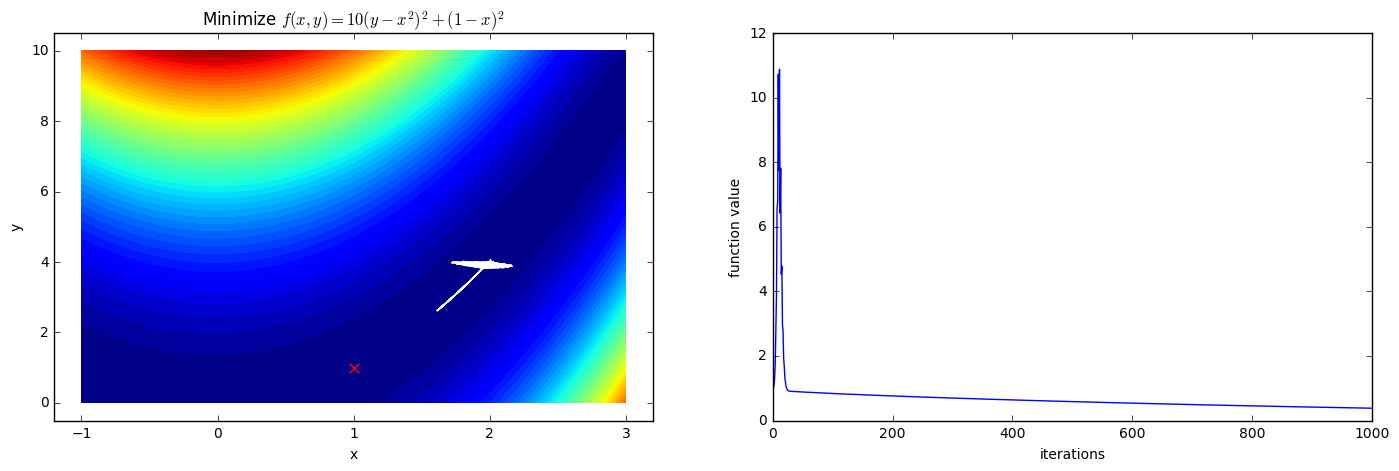

In [32]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -1,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");